In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import os
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator
import math
import pandas as pd

In [82]:
image_file = fits.open("/Users/Dominic/Lamat/SN2021gmj/MAST_2022-07-06T19_03_24.129Z/HST/SN/IERG23010/ierg23010_drz.fits")

In [83]:
header = image_file[0].header

In [95]:
#testing single drz
date = header["DATE-OBS"]
instrument = header["INSTRUME"]
filter = header["FILTER"]
expos_time = header["EXPTIME"]
print(date + " " + instrument + " " + filter + " " + str(expos_time))
image_file.close()

2021-12-26 WFC3 F814W 780.0


In [11]:
#SN2021sjt find information about drcs
#find path
path = r"C:\Users\domdo\Lamat\Foley\DRC data\ALLDRC"
dir_list = os.listdir(path)
true_mjd_values_F555W = np.empty(0)
true_mjd_values_F814W = np.empty(0)
#for each file in path
for file in os.listdir(path):
    filename = os.fsdecode(file)
    #if file ends with _drc.fits, print filename, date, find mjd true values and put into array, instrument, exp time, filter
    if filename.endswith("_drc.fits"):
            image_path = path + "\\" + os.path.basename(filename)
            print(filename)
            image = fits.open(image_path)
            header = image[0].header
            filter = ""
            #different fits have different filter name, sort through common 3
            if "FILTNAM1" in header:
                if header["FILTNAM1"] != "CLEAR1L" or header["FILTNAM1"] != "CLEAR2L":
                    filter = header["FILTNAM1"] 
            elif "FILTER" in header:
                if header["FILTER"] != "CLEAR1L" or header["FILTER"] != "CLEAR2L":
                    filter = header["FILTER"]
            elif "FILTER1" in header:
                if header["FILTER1"] == "CLEAR1L" or header["FILTER1"] == "CLEAR2L":
                    filter = header["FILTER2"]
                else:
                    filter = header["FILTER1"]
            #calc true_mjd and add to array
            exptime_mjd = header["EXPEND"] - header["EXPSTART"]
            true_mjd = header["EXPEND"] - exptime_mjd
            if (filter == "F814W"):
                true_mjd_values_F814W = np.append(true_mjd_values_F814W, true_mjd)
            elif (filter == "F555W"):
                true_mjd_values_F555W = np.append(true_mjd_values_F555W, true_mjd)
            print(header["DATE-OBS"] + "\n" + "True MJD: " + str(true_mjd) + "\n" + header["INSTRUME"] + "\n" + str(header["EXPTIME"]) + "\n" + filter + "\n")
            image.close()
true_mjd_values_F555W

icuq09010_drc.fits
2015-11-25
True MJD: 57351.55186913
WFC3
780.0
F814W

id9603010_drc.fits
2016-10-15
True MJD: 57676.04401873
WFC3
780.0
F814W

id9603020_drc.fits
2016-10-15
True MJD: 57676.05015317
WFC3
710.0
F555W

idi107010_drc.fits
2017-11-10
True MJD: 58067.78674122
WFC3
780.0
F814W

idi107020_drc.fits
2017-11-10
True MJD: 58067.79287566
WFC3
710.0
F555W

ieb338010_drc.fits
2020-12-13
True MJD: 59196.92537475
WFC3
780.0
F814W

ieb338020_drc.fits
2020-12-13
True MJD: 59196.93154364
WFC3
710.0
F555W

ierg27010_drc.fits
2022-02-17
True MJD: 59627.146954
WFC3
780.0
F814W

ierg27020_drc.fits
2022-02-17
True MJD: 59627.15312326
WFC3
710.0
F555W

jey380010_drc.fits
2023-02-22
True MJD: 59997.31889922
ACS
780.0
F814W

jey380020_drc.fits
2023-02-22
True MJD: 59997.3254733
ACS
760.0
F555W



array([57676.05015317, 58067.79287566, 59196.93154364, 59627.15312326,
       59997.3254733 ])

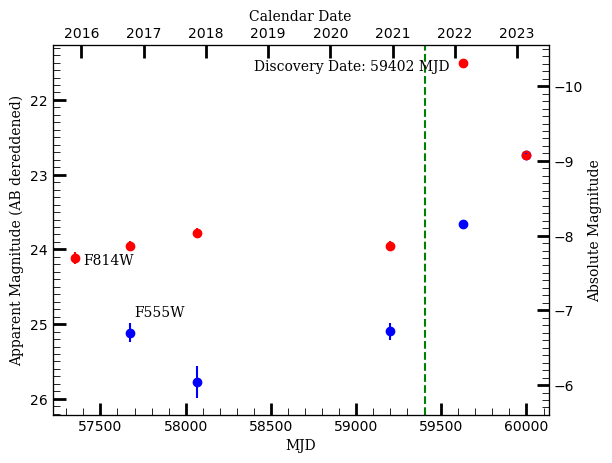

In [10]:
#graph true_mjd_values against magnitude for sjt
vega_values_F555W = np.array([26.214, 26.88, 26.194, 24.758, 23.838])
vega_error_F555W = np.array([0.128, 0.21, 0.111, 0.042, 0.03])
# convert to ab_mag using plot_sed_v2
ab_mag_dereddened_F555W = np.array([25.116, 25.776, 25.096, 23.656, 22.736])
ab_mag_dereddened_err_F555W = np.array([0.13, 0.21, 0.11, 0.04, 0.03])

vega_values_F814W = np.array([24.24, 24.071, 23.898, 24.068, 21.618, 22.862])
vega_error_F814W = np.array([0.078, 0.064, 0.057, 0.061, 0.013, 0.022])
# convert to ab_mag using plot_sed_v2
ab_mag_dereddened_F814W = np.array([24.119, 23.949, 23.779, 23.949, 21.499, 22.739])
ab_mag_dereddened_err_F814W = np.array([0.08, 0.06, 0.06, 0.06, 0.01, 0.022])

true_mjd_range = np.concatenate((true_mjd_values_F555W, true_mjd_values_F814W), axis=None)
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 13,
        }

fig, ax = plt.subplots()

ax.tick_params(labelcolor='black', labelsize='medium', width=2)
ax.tick_params(direction='in', which='both', length = 5)
ax.tick_params(which='major', length=9)

ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.xaxis.set_minor_locator(MultipleLocator(100))
ax.xaxis.set_major_locator(MultipleLocator(500))

ax.scatter(true_mjd_values_F555W, ab_mag_dereddened_F555W, label = "F555W", color = 'blue') 
ax.scatter(true_mjd_values_F814W, ab_mag_dereddened_F814W, label = "F814W", color = 'red')

ax.text(57400, 24.2, 'F814W', fontsize=10, family = 'serif')
ax.text(57700, 24.9, 'F555W', fontsize=10, family = 'serif')
ax.text(58400, 21.6, 'Discovery Date: 59402 MJD', fontsize=10, family = 'serif')
#plt.title("True MJD vs AB mag (dereddened)", fontdict = font) 
plt.xlabel("MJD", fontdict = font, size = 10) 
plt.ylabel("Apparent Magnitude (AB dereddened)", fontdict = font, size = 10)

yerr = ab_mag_dereddened_err_F555W
ax.errorbar(true_mjd_values_F555W, ab_mag_dereddened_F555W, yerr=yerr, label='AB err F555W', ls="none", color = 'blue')
yerr = ab_mag_dereddened_err_F814W
ax.errorbar(true_mjd_values_F814W, ab_mag_dereddened_F814W, yerr=yerr, label='AB err F814W', ls="none", color = 'red')

plt.gca().invert_yaxis()

plt.axvline(x = 59402, color = 'g', ls="dashed")


ax2 = ax.twinx()
def appar_mag_to_absol_mag(appar_mag):
    #from NED, 23.072 Mpc with std. dev. of 3.541
    #yse-pz is 20.418 Mpc
    absol_mag = (appar_mag - 5*(math.log10((23.072*1000000)) - 1))
    #print(absol_mag)
    return(absol_mag)
ymin, ymax = ax.get_ylim()
#print (ymin, ymax)
ax2.set_ylabel("Absolute Magnitude", fontdict = font, size = 10)
ax2.set_ylim(appar_mag_to_absol_mag(ymin), appar_mag_to_absol_mag(ymax))
ax2.yaxis.set_minor_locator(MultipleLocator(0.1))
ax2.tick_params(labelcolor='black', labelsize='medium', width=2)
ax2.tick_params(direction='in', which='both', length = 5)
ax2.tick_params(which='major', length=9)

ax2 = ax.twiny()
def mjd_to_calendar_date(mjd):
    jd = mjd + 2400000.5
    t = pd.to_datetime(jd, origin='julian', unit='D')
    #print(t)
    return(t)
xmin, xmax = ax.get_xlim()
#print (xmin, xmax)
ax2.set_xlabel("Calendar Date", fontdict = font, size = 10)
ax2.set_xlim(mjd_to_calendar_date(xmin), mjd_to_calendar_date(xmax))
ax2.tick_params(labelcolor='black', labelsize='medium', width=2)
ax2.tick_params(direction='in', which='both', length = 5)
ax2.tick_params(which='major', length=9)


    

#L = plt.legend()
#plt.setp(L.texts, family='serif', fontsize = 8)
plt.show()

In [182]:
#SN2021gmj
#find path
path = "/Users/Dominic/Lamat/SN2021gmj/DRZ"
dir_list = os.listdir(path)
#for each file in path
for file in os.listdir(path):
    filename = os.fsdecode(file)
    #if file ends with _drz.fits, print filename, date, instrument, exp time, filter
    if filename.endswith("_drz.fits"):
            image_path = path +"/" + os.path.basename(filename)
            print(filename)
            image = fits.open(image_path)
            header = image[0].header
            filter = ""
            #different fits have different filter name, sort through common 3
            if "FILTNAM1" in header:
                filter = header["FILTNAM1"] 
            elif "FILTER" in header:
                filter = header["FILTER"]
            else:
                filter = header["FILTER1"]
            print(header["DATE-OBS"] + "\n" + header["INSTRUME"] + "\n" + str(header["EXPTIME"]) + "\n" + filter)
            image.close()

u3lx0103r_drz.fits
1997-03-13
WFPC2
180.0
F814W
u3lx0105r_drz.fits
1997-03-13
WFPC2
300.0
F439W
u3lx0102r_drz.fits
1997-03-13
WFPC2
500.0
F336W
u3lx0104r_drz.fits
1997-03-13
WFPC2
160.0
F814W
u65r1301r_drz.fits
2000-09-12
WFPC2
100.0
F814W
u3lx0101r_drz.fits
1997-03-13
WFPC2
500.0
F336W
u65r1304r_drz.fits
2000-09-13
WFPC2
160.0
F814W
u65r1302r_drz.fits
2000-09-12
WFPC2
1000.0
F300W
j8og20oiq_drz.fits
2003-10-21
ACS
100.0
F625W
u3lx0106r_drz.fits
1997-03-13
WFPC2
300.0
F439W
j8og20010_drz.fits
2003-10-21
ACS
950.0
F658N
u65r1303r_drz.fits
2000-09-13
WFPC2
900.0
F300W
